# Import Modules

In [7]:
import numpy as np # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt #graphical Representation

# Load Data

In [8]:
df=pd.read_csv("rainfall in india 1901-2015.csv")

# Visualize data 

In [9]:
# first five rows of data
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


# Shape of data

In [10]:
# outputs rows and columns of data
df.shape

(4116, 19)

# Type of Data

In [11]:
df.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

# DATA ANALYSIS

## Overall Rainfall Pattern in India over past 100 years

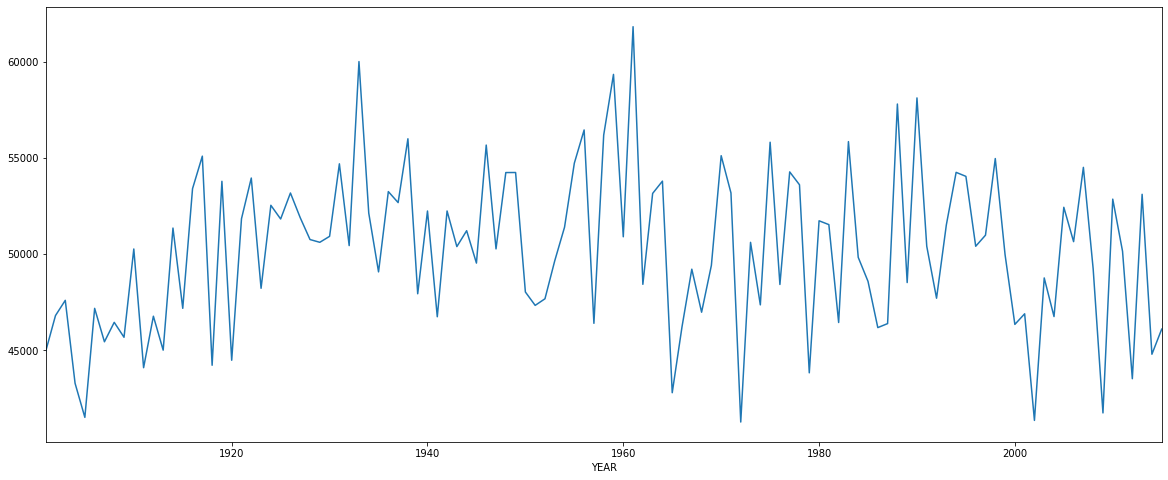

In [12]:
df.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(20,8));

## Overall rainfall in India by Month

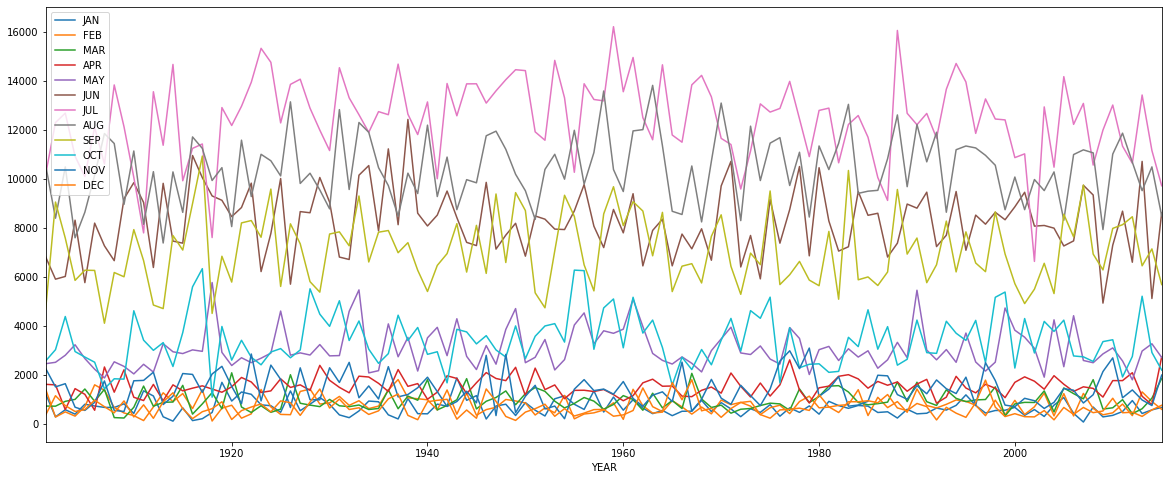

In [13]:
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(20,8))

## Overall Rainfall by Month for each State

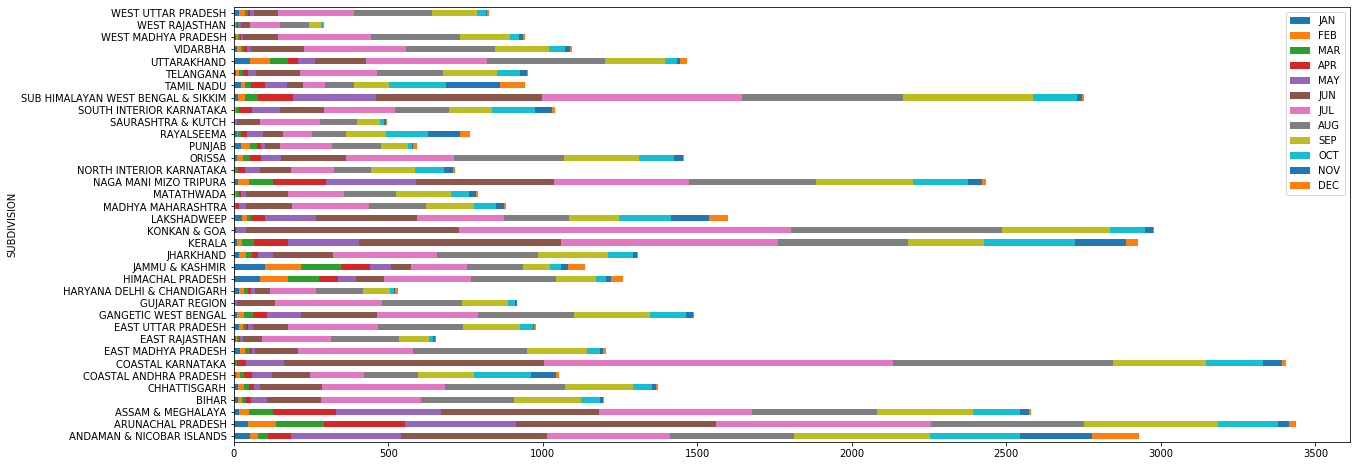

In [14]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(20,8));

## Highest Individual Rainfall in an Year

In [15]:
highest_rain = df[df['ANNUAL'].notnull()][['SUBDIVISION', 'YEAR','ANNUAL']].sort_values('ANNUAL', ascending=False).head(10)
highest_rain.reset_index(inplace=True)
highest_rain


,index,SUBDIVISION,YEAR,ANNUAL
0,142,ARUNACHAL PRADESH,1948,6331.1
1,132,ARUNACHAL PRADESH,1938,6129.0
2,115,ARUNACHAL PRADESH,1921,5691.4
3,3602,COASTAL KARNATAKA,1961,5553.9
4,112,ARUNACHAL PRADESH,1918,5486.3
5,122,ARUNACHAL PRADESH,1928,5272.7
6,121,ARUNACHAL PRADESH,1927,5253.2
7,149,ARUNACHAL PRADESH,1958,5063.5
8,155,ARUNACHAL PRADESH,1964,4959.3
9,143,ARUNACHAL PRADESH,1949,4874.7


## Lowest Individual Rainfall in an Year

In [16]:
lowest_rain = df[df['ANNUAL'].notnull()][['SUBDIVISION', 'YEAR','ANNUAL']].sort_values('ANNUAL', ascending=False).tail(10)
lowest_rain.reset_index(inplace=True)
lowest_rain

,index,SUBDIVISION,YEAR,ANNUAL
0,1884,WEST RAJASTHAN,1968,142.2
1,2402,SAURASHTRA & KUTCH,1911,140.4
2,1827,WEST RAJASTHAN,1911,138.8
3,1855,WEST RAJASTHAN,1939,137.4
4,1885,WEST RAJASTHAN,1969,119.0
5,2409,SAURASHTRA & KUTCH,1918,117.6
6,1821,WEST RAJASTHAN,1905,114.4
7,2478,SAURASHTRA & KUTCH,1987,92.7
8,1918,WEST RAJASTHAN,2002,92.4
9,1834,WEST RAJASTHAN,1918,62.3


## Top 10 states with Highest Rainfall in India since 1900

In [17]:
top = df.groupby(by='SUBDIVISION').sum()[['ANNUAL']].sort_values(by='ANNUAL', ascending=False).head(10)
top

,ANNUAL
SUBDIVISION,
COASTAL KARNATAKA,388558.7
KONKAN & GOA,342433.9
KERALA,336431.1
SUB HIMALAYAN WEST BENGAL & SIKKIM,316505.0
ARUNACHAL PRADESH,311116.0
ANDAMAN & NICOBAR ISLANDS,304453.7
ASSAM & MEGHALAYA,296780.0
NAGA MANI MIZO TRIPURA,279866.2
GANGETIC WEST BENGAL,171406.1


## Top 10 states with Lowest Rainfall in India since 1900

In [18]:
bottom = df.groupby(by='SUBDIVISION').sum()[['ANNUAL']].sort_values(by='ANNUAL', ascending=True).head(10)
bottom

,ANNUAL
SUBDIVISION,
WEST RAJASTHAN,33657.4
SAURASHTRA & KUTCH,56943.6
HARYANA DELHI & CHANDIGARH,61007.1
PUNJAB,68256.6
EAST RAJASTHAN,75349.8
NORTH INTERIOR KARNATAKA,82546.5
RAYALSEEMA,88113.7
MATATHWADA,90929.6
WEST UTTAR PRADESH,95118.2


## Overall Rainfall Pattern in Bihar over past 100 years

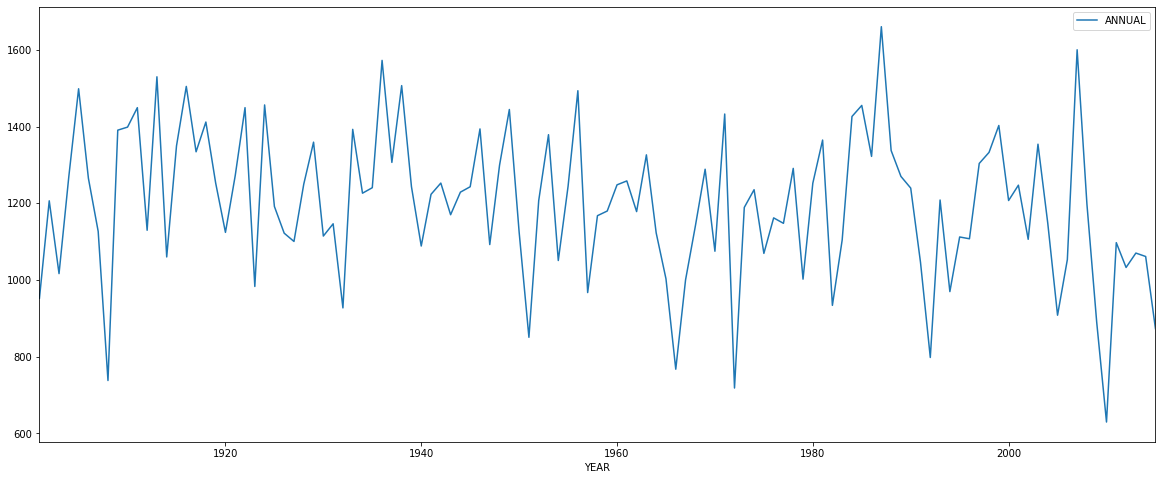

In [19]:
bihar = df[df['SUBDIVISION'] == 'BIHAR'][['YEAR','ANNUAL']]

bihar.plot(figsize=(20,8),x='YEAR',y='ANNUAL')